In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
edu_ps_df = pd.read_csv("CSVfiles/postsecondary_data.csv", encoding="utf-8", index_col="Year")
edu_k12_df = pd.read_csv("CSVfiles/k_12_data.csv", encoding="utf-8", index_col="Year")


In [3]:
edu_k5_df = edu_k12_df[['Enrolled in K', 'Enrolled in 1st', 'Enrolled in 2nd', 'Enrolled in 3rd', 'Enrolled in 4th', 'Enrolled in 5th']]
edu_6to8_df = edu_k12_df[['Enrolled in 6th', 'Enrolled in 7th', 'Enrolled in 8th']]
edu_9to12_df = edu_k12_df[['Enrolled in 9th', 'Enrolled in 10th', 'Enrolled in 11th', 'Enrolled in 12th']]

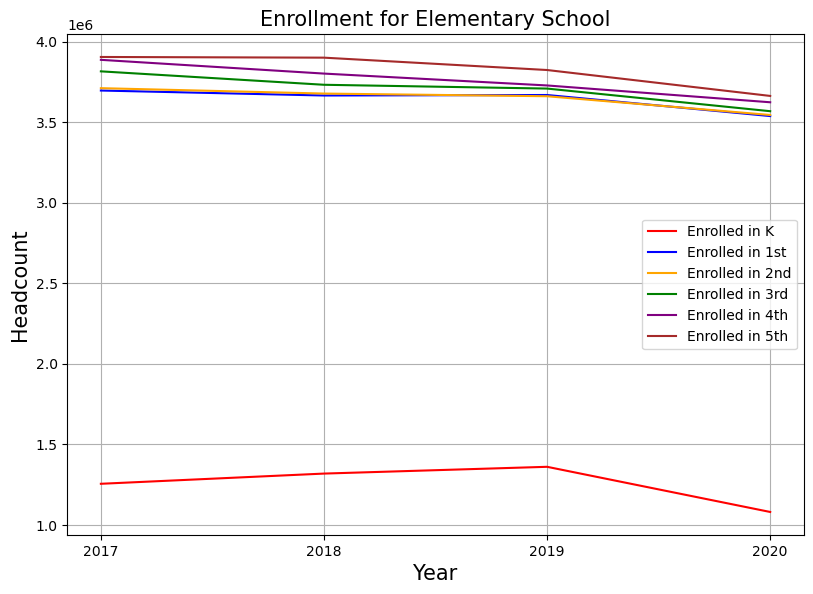

In [4]:
# Build line plot for elem school
fig, ax = plt.subplots()
edu_k5_df.plot(kind='line', ax=ax, color=['r', 'b', 'orange', 'g', 'purple', 'brown'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for Elementary School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/elem_headcounts.png")

# Show plot
plt.show()


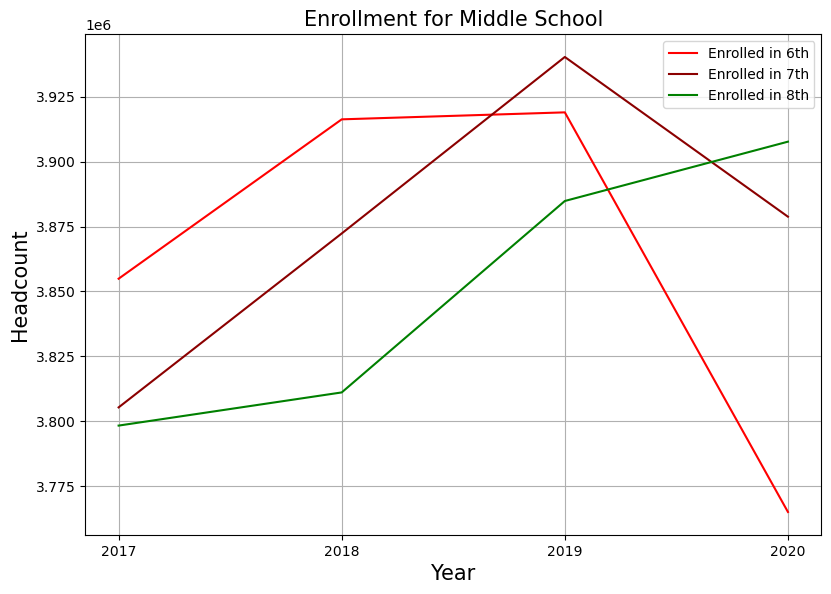

In [5]:
# Build line plot for middle school
fig, ax = plt.subplots()
edu_6to8_df.plot(kind='line', ax=ax, color=['r', 'darkred', 'g'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for Middle School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/ms_headcounts.png")

# Show plot
plt.show()

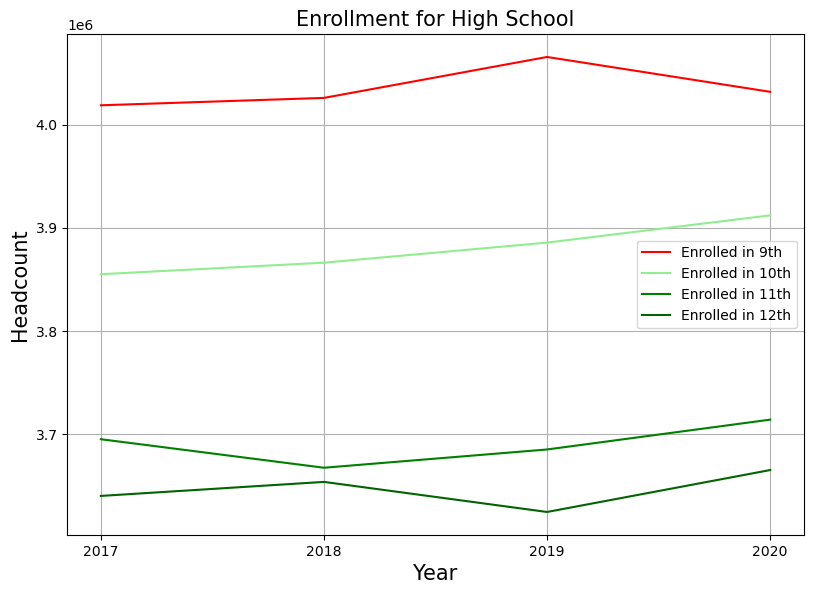

In [6]:
# Build line plot for high school
fig, ax = plt.subplots()
edu_9to12_df.plot(kind='line', ax=ax, color=['r', 'lightgreen', 'g', 'darkgreen'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for High School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/hs_headcounts.png")

# Show plot
plt.show()

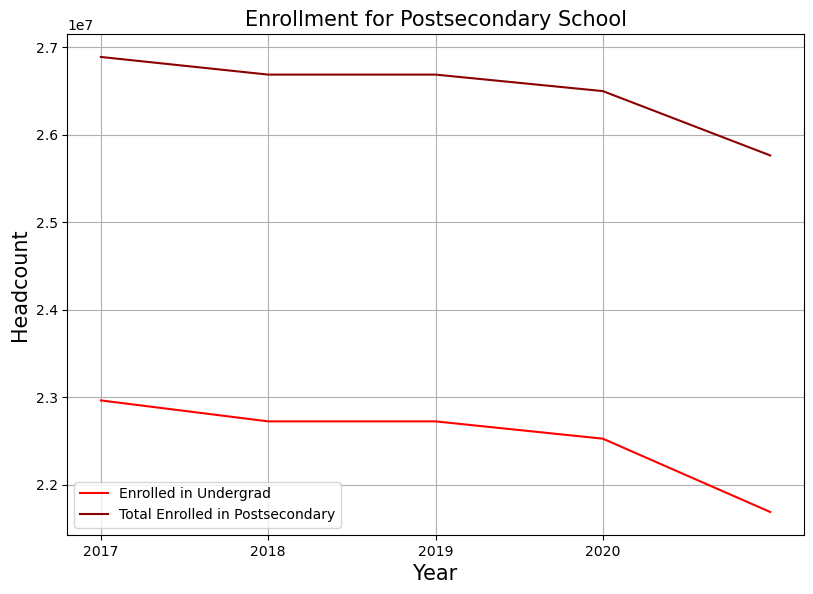

In [7]:
# Build line plot for postsecondary school
fig, ax = plt.subplots()
edu_ps_df[['Enrolled in Undergrad','Total Enrolled in Postsecondary']].plot(kind='line', ax=ax, color=['r', 'darkred'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for Postsecondary School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/ps_headcounts.png")

# Show plot
plt.show()

In [8]:
df = pd.read_csv("CSVfiles/WPP2022_Demographic_Indicators_Medium.csv")
df = df[(df['Location'] == 'United States of America') & (df['Time'].isin([2018,2019,2020, 2021]))][['Location', 'Time', 'Deaths']]
df

C:\Users\carso\AppData\Local\Temp\ipykernel_19188\2645720572.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CSVfiles/WPP2022_Demographic_Indicators_Medium.csv")


,Location,Time,Deaths
39132,United States of America,2018,2780.175
39133,United States of America,2019,2778.148
39134,United States of America,2020,3238.518
39135,United States of America,2021,3280.682


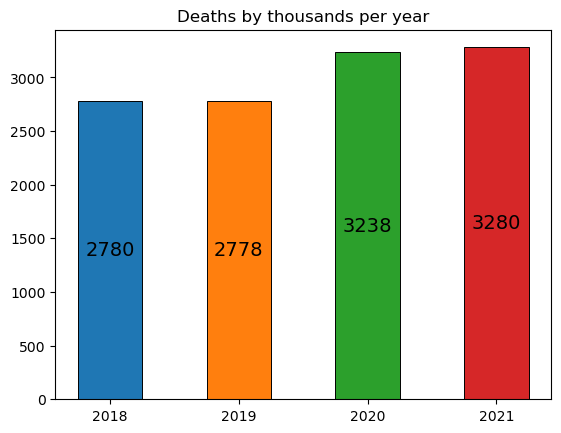

In [9]:
fig, ax = plt.subplots()

df_grouped = df.groupby('Time')
for time, group in df_grouped:
    c = ax.bar(group['Time'], group['Deaths'], width= 0.5, edgecolor= 'black', linewidth= 0.7, label=str(time))
    labels = [str(int(val)) for val in group['Deaths']]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14)

plt.xticks(df['Time'])
plt.title("Deaths by thousands per year")
plt.show()

In [10]:
# Read the CSV file into a data frame
df2 = pd.read_csv("CSVfiles/WHO-COVID-19-global-data.csv")

# Filter the data frame to only include the countries of interest
countries = ['China', 'India', 'United States of America', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Mexico']
df2 = df2[df2['Country'].isin(countries)]

# Sort the data frame based on 'Country' and 'New_cases' in ascending and descending order respectively
df2 = df2.sort_values(by=['Country', 'New_cases'], ascending=[True, False])

# Drop duplicate entries for each country and keep only the first (highest) entry
df2 = df2.drop_duplicates(subset='Country', keep='first')

# Select only the 'Country', 'New_cases', and 'Date_reported' columns
df2 = df2[['Country', 'New_cases', 'Date_reported']]

# Rename the columns
df2.columns = ['Country', 'Highest New Cases', 'Date_reported']

# Set the index of the data frame to be the 'Country' column
df2.set_index('Country', inplace=True)

# Show the resulting data frame
df2['Date_reported'] = pd.to_datetime(df2['Date_reported'], format='%Y-%m-%d')
df2.sort_values(by='Date_reported', inplace=True)
df2

,Highest New Cases,Date_reported
Country,,
India,414188,2021-05-07
Bangladesh,16230,2021-07-28
Nigeria,4035,2021-12-23
United States of America,1265520,2022-01-12
Mexico,81266,2022-01-19
Pakistan,8183,2022-01-29
Brazil,298408,2022-02-05
Russian Federation,203949,2022-02-11
Indonesia,64718,2022-02-16


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

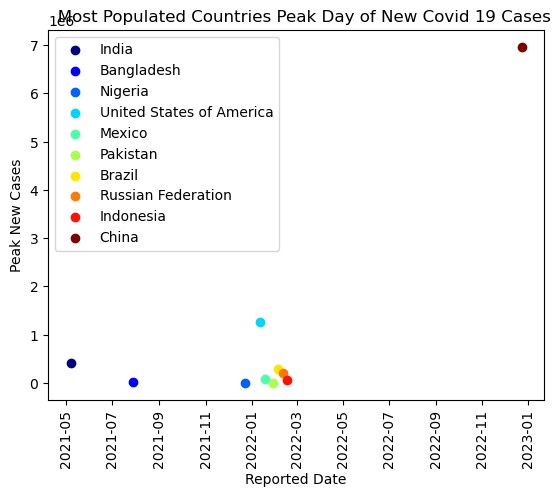

In [12]:
# Create a list of scatter plots with different colors for each country
scatters = []
for i, country in enumerate(df2.index):
    scatters.append(plt.scatter(df2.loc[country, 'Date_reported'], df2.loc[country, 'Highest New Cases'], c=plt.cm.jet(np.linspace(0,1,len(df2)))[i], label=country))

# Add labels for the x-axis and y-axis
plt.xticks(rotation=90) 
plt.xlabel('Reported Date')
plt.ylabel('Peak New Cases')
plt.title('Most Populated Countries Peak Day of New Covid 19 Cases')
# Create the legend
plt.legend(handles=scatters)
# Show the plot
plt.show()

In [13]:
# get data will take the csv data, and cut out the first 11 lines
# so that only the usable data is being parsed

def get_data(filename, firstIndex, secondIndex) -> list:
    data = pd.read_csv(filename, header=None)
    data = data.iloc[firstIndex:secondIndex]
    return data.values.tolist()

#parse data will take the raw data and format it into a way where we can plot it
def parse_data(data, firstIndex, secondIndex):
    data = get_data(data, firstIndex, secondIndex)
    monthsAndYears = []
    values = []
    months = ["Jan", "F", "Mar", "Ap", "May", "Jun", "Jul", "Au", "S", "O", "N", "D"]
    for i in range(len(data)):
        dataInYear = data[i]
        year = dataInYear.pop(0)
        for j in range(len(dataInYear)):
            monthAndYear = f'{months[j]}{year[2]}{year[3]}'
            unemploymentRate = dataInYear[j]
            monthsAndYears.append(monthAndYear)
            values.append(unemploymentRate)
    for i in range(len(values)):
        values[i] = float(values[i])
    return [monthsAndYears, values]
        

#firstIndex is exclusive, secondIndex is inclusive
unemploymentData = parse_data('unemployment.csv', 18, 22)
plt.plot(unemploymentData[0], unemploymentData[1])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'unemployment.csv'